### Quick Start
可以在本文档快速体验下KAN网络

初始化

In [1]:
from kan import *
torch.set_default_dtype(torch.float64)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

model = KAN(width=[2,5,1], grid=3, k=3, seed=42, device=device)

cuda
checkpoint directory created: ./model
saving model version 0.0


加载数据集

In [2]:
from kan.utils import create_dataset
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2, device=device)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

Plot KAN at initialization

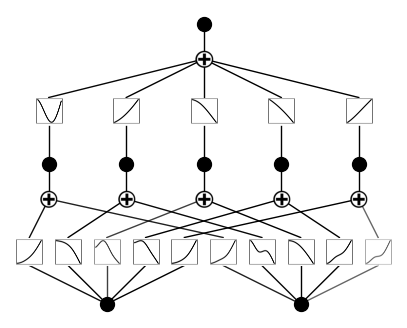

In [3]:
# plot KAN at initialization
model(dataset['train_input']);
model.plot()

使用稀疏正则化训练 KAN

In [4]:
# train the model
model.fit(dataset, opt="LBFGS", steps=50, lamb=0.001);

| train_loss: 1.93e-02 | test_loss: 1.91e-02 | reg: 5.80e+00 | : 100%|█| 50/50 [00:20<00:00,  2.38it

saving model version 0.1


展示训练的 KAN

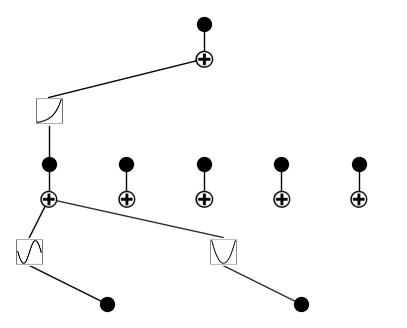

In [5]:
model.plot()

剪枝并重新展示模型

saving model version 0.2


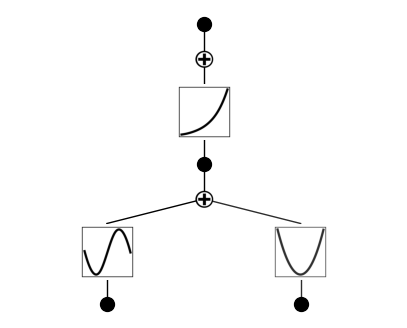

In [6]:
model = model.prune()
model.plot()

Continue training and replot

In [7]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 1.77e-02 | test_loss: 1.70e-02 | reg: 8.24e+00 | : 100%|█| 50/50 [00:13<00:00,  3.84it

saving model version 0.3


In [8]:
model = model.refine(10)

saving model version 0.4


In [9]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 4.63e-04 | test_loss: 4.70e-04 | reg: 8.29e+00 | : 100%|█| 50/50 [00:12<00:00,  3.89it

saving model version 0.5


设置符号激活函数

In [10]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with sin, r2=0.9999999195225159, c=2
fixing (0,1,0) with x^2, r2=0.9999999832365951, c=2
fixing (1,0,0) with exp, r2=0.9999999912340055, c=2
saving model version 0.6


继续训练

In [11]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 7.02e-09 | test_loss: 6.97e-09 | reg: 0.00e+00 | : 100%|█| 50/50 [00:04<00:00, 11.85it


saving model version 0.7


获得结果

In [12]:
from kan.utils import ex_round

ex_round(model.symbolic_formula()[0][0],4)

1.0*exp(1.0*x_2**2 + 1.0*sin(3.1416*x_1))